In [54]:
import torch.nn as nn
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

In [131]:
features = np.array([[0,0],[0,1],[1,0],[1,1]])
targets = np.array([[0],[0],[0],[1]])

dataset = TensorDataset(torch.tensor(features).float(),torch.tensor(targets).float())
dataloader = DataLoader(dataset,batch_size=1)

In [177]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
criterion = nn.BCELoss()

In [178]:
num_epochs = 100
loss_history = {}
for epoch in range(num_epochs):
    for data in dataloader:
        optimizer.zero_grad()
        
        features, target = data
        
        pred = model(features)

        loss = criterion(pred,target)

        loss.backward()

        optimizer.step()
    loss_history[epoch] = loss.item()

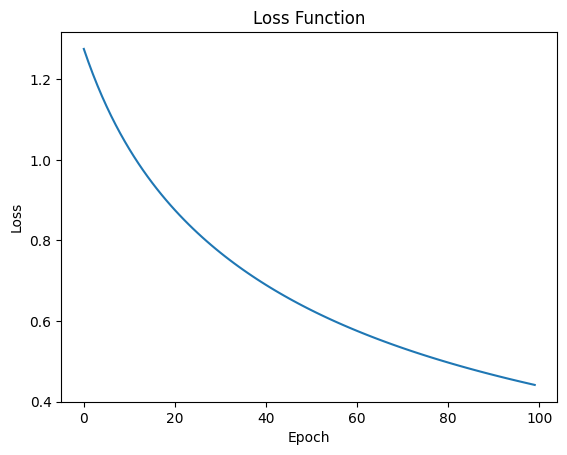

In [182]:
import matplotlib.pyplot as plt

plt.plot(loss_history.keys(),loss_history.values())
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Function")
plt.show()

In [183]:
with torch.no_grad():
    test_inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    predictions = model(test_inputs)
    predicted_labels = predictions.round()
    print("\nPredictions:", predicted_labels)


Predictions: tensor([[0.],
        [0.],
        [0.],
        [1.]])
